In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Funktion zum Einlesen der Spektren aus den CSV-Dateien
!pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/dc/53/15b0fdb9e7285be11cf51deaf62705645651ae296d5db076dc4b6881c97b/shap-0.45.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.1/452.1 kB 7.0 MB/s eta 0:00:00a 0:00:01


In [3]:
import shap

Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

          OE       0.86      0.76      0.81        25
          RE       0.79      0.88      0.84        26

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



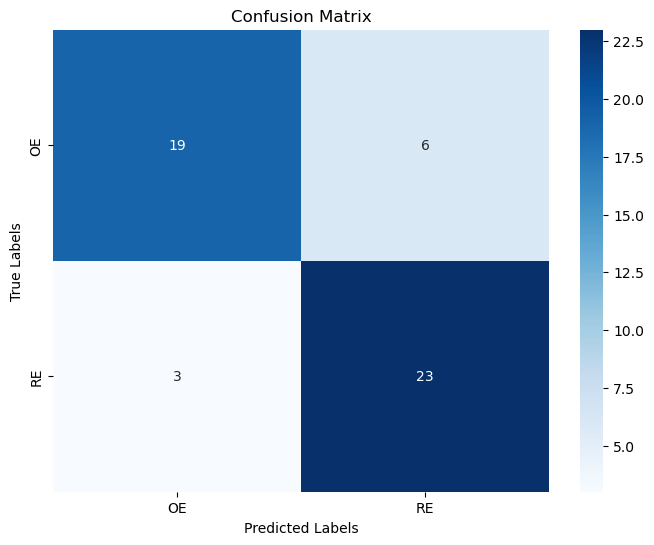

In [5]:
# Funktion zum Einlesen der Spektren aus den CSV-Dateien
def read_spectra_from_folder(folder_path, max_length=None):
    spectra = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            data = pd.read_csv(os.path.join(folder_path, file), header=None)
            # Überprüfen, ob die Daten eindimensional sind
            if data.shape[1] == 1:
                spectrum = data.values.flatten()
                # Auffüllen oder Kürzen auf maximale Länge
                if max_length is not None:
                    if len(spectrum) < max_length:
                        spectrum = np.pad(spectrum, (0, max_length - len(spectrum)), mode='constant')
                    elif len(spectrum) > max_length:
                        spectrum = spectrum[:max_length]
                spectra.append(spectrum)
                # Extrahiere die Klassen (OE oder RE) aus dem Dateinamen
                if 'OE' in file:
                    labels.append('OE')
                elif 'RE' in file:
                    labels.append('RE')
                else:
                    labels.append('Unknown')
            else:
                print(f"Die Datei {file} enthält nicht die erwarteten Daten.")
    return spectra, labels

# Lade die Spektren aus dem Ordner und stelle sicher, dass alle Spektren die gleiche Länge haben
max_length = 2523  # Beispiel: feste maximale Länge der Spektren
spectra, labels = read_spectra_from_folder("/Users/leokavallaris/FTIR ATR/Spectra OE RE/122", max_length=max_length)

# Teile die Daten in Trainings- und Testsets auf
if spectra and labels:
    X_train, X_test, y_train, y_test = train_test_split(spectra, labels, test_size=0.2, random_state=42)
    
    # ... (your code up to the model training part)

    model = LogisticRegression(max_iter=10000)  # Increase max_iter
    model.fit(X_train, y_train)

    # Mache Vorhersagen auf dem Testset
    predictions = model.predict(X_test)

    # Auswertung der Modellleistung
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    # Konfusionsmatrix
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['OE', 'RE'], yticklabels=['OE', 'RE'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [8]:
# Umwandeln des LogisticRegression-Modells in eine Vorhersagefunktion
f = lambda x: model.predict_proba(x)[:, 1]

shap_values = explainer(X_test, max_evals="auto")


# Plotten der SHAP-Werte
shap.summary_plot(shap_values, X_test, plot_type="bar")


TypeError: 'list' object is not callable